# Predicting Customer Churn on telecom's operations

## Customer churn: what is this about?

Customer churn refers to a customer's decision of ending a comercial relationship for any reason. It has a direct impact on market share losses and on the company's revenue.

For this reason, it is important to a firm to mitigate as much as possible this indicator in its operation. To acomplish this, it is necessary to measure customer churn, to map its correlated variables and to implement objective actions to attack it. But it is also possible, in studying the operation, to model customer churn and its variables and to predict it trough machine learning techniques.

In this exercise, we will model the customer churn of a telecom operation and use logistic regression to predict the indicator and to determine the probability of a given customer of ending its relationship with the company.

In [1]:
# Import modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Now, let's study our training dataset:

There are 3.333 rows in 21 columns.

The first columns refers to the customer identification; then follows 5 categoric variables (state, account_length, area_code, international_plan and voice_mail_plan) and 14 numeric variables, related to the operation's key performance indicators. Finaly, we have the output variable, 'churn'. 

In [2]:
teldf = pd.read_csv('projeto4_telecom_treino.csv')
teldf.shape

(3333, 21)

In [3]:
teldf.ftypes

Unnamed: 0                         int64:dense
state                             object:dense
account_length                     int64:dense
area_code                         object:dense
international_plan                object:dense
voice_mail_plan                   object:dense
number_vmail_messages              int64:dense
total_day_minutes                float64:dense
total_day_calls                    int64:dense
total_day_charge                 float64:dense
total_eve_minutes                float64:dense
total_eve_calls                    int64:dense
total_eve_charge                 float64:dense
total_night_minutes              float64:dense
total_night_calls                  int64:dense
total_night_charge               float64:dense
total_intl_minutes               float64:dense
total_intl_calls                   int64:dense
total_intl_charge                float64:dense
number_customer_service_calls      int64:dense
churn                             object:dense
dtype: object

In [4]:
teldf.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## Preprocessing

First, let's treat the 5 categoric variables. We use scikit learn LabelEncoder() to set numeric indexes to 'area_conde' and 'state'. We don't need to apply this treatment to 'account_length'.

'international_plan', 'voice_mail_plan' and the output 'churn' are binary variables; we just replace 'no' by 0 and 'yes' by 1. 

In [5]:
X_area_code = teldf['area_code']
X_state = teldf['state']
encoder_areacode = LabelEncoder().fit(X_area_code)
encoder_state = LabelEncoder().fit(X_state)
X_area_code_encoded = encoder_areacode.transform(X_area_code)
X_state_encoded = encoder_state.transform(X_state)

teldf1 = teldf.iloc[:, 6:20]
teldf1['account_length'] = teldf['account_length']
teldf1['area_code2'] = X_area_code_encoded
teldf1['state2'] = X_state_encoded
teldf1['international_plan2'] = teldf['international_plan'].apply(lambda x: 1 if x == 'yes' else 0)
teldf1['voice_mail_plan2'] = teldf['voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)
teldf1['churn2'] = teldf['churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
teldf1.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length,area_code2,state2,international_plan2,voice_mail_plan2,churn2
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,128,1,16,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,107,1,35,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,137,1,31,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,84,0,35,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,75,1,36,1,0,0


In [7]:
print(teldf1.dtypes)
print(teldf1.shape)

number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
account_length                     int64
area_code2                         int64
state2                             int64
international_plan2                int64
voice_mail_plan2                   int64
churn2                             int64
dtype: object
(3333, 20)


The 14 numeric variables seem to fit, in general, the Normal distribution ('number_vmail_messages' is the most proeminent exception, as it seems to fit an exponential curve better).

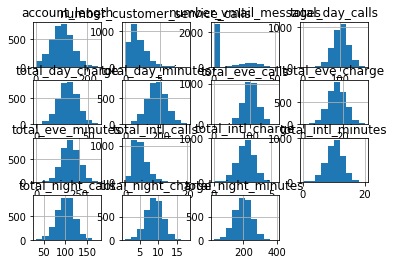

In [8]:
teldf1.iloc[:, :15].hist()
plt.show()

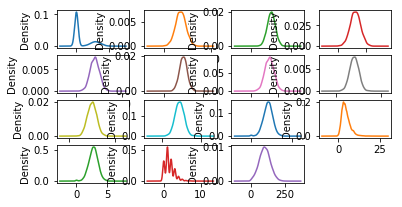

In [9]:
teldf1.iloc[:, :15].plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=False)
plt.show()

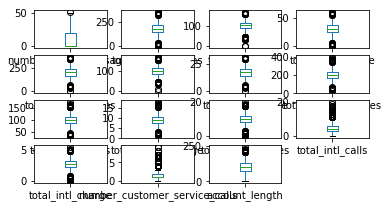

In [10]:
teldf1.iloc[:, :15].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, legend=False)
plt.show()

Now, we have to analyze the correlations between the variables. The graphics show that most of the variables are not muchh correlated between then, implying that a dimensionality reduction will not be necessary.

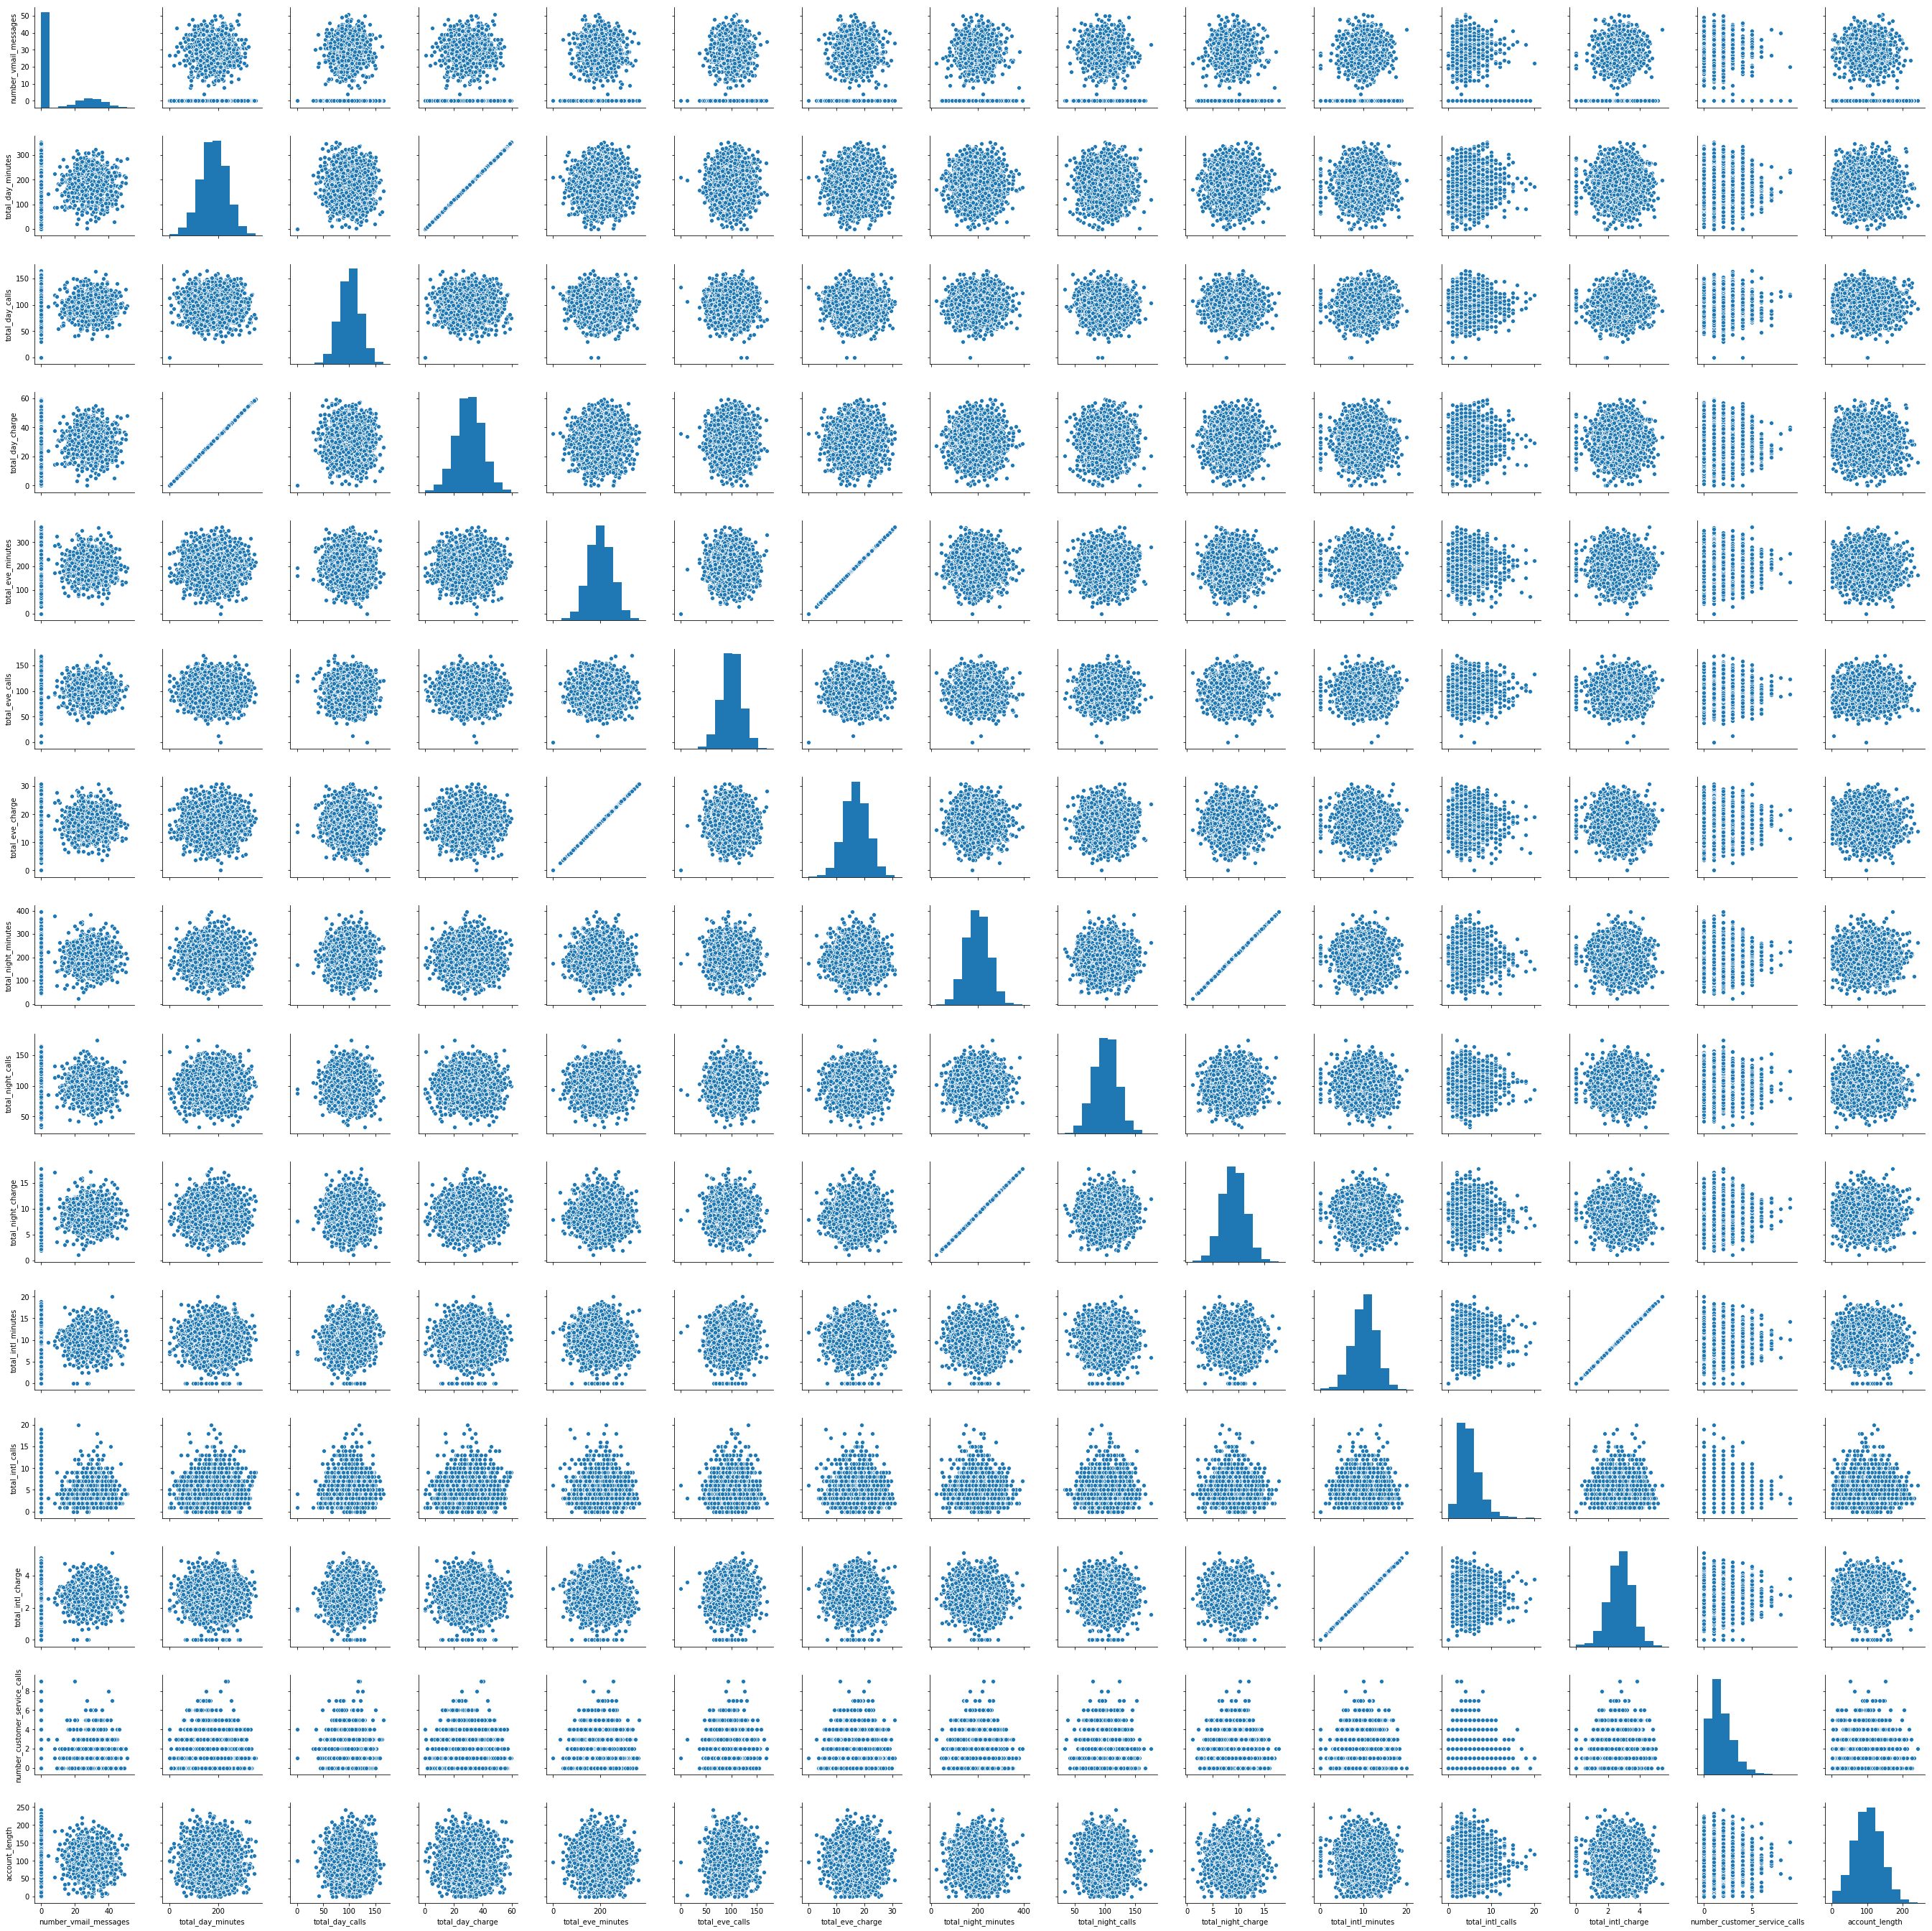

In [11]:
sns.pairplot(teldf1.iloc[:, :15])
plt.show()

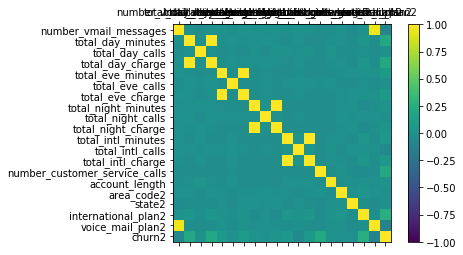

In [12]:
correlations = teldf1.corr()
colunas = teldf1.columns

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 20, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

Viewing the categorical variables, it is possible to see that the classes of the target 'churn' are strongly imbalanced, what can biase the analysis. Let's use the SMOTE package to over sample the positive class, in order to correct it.

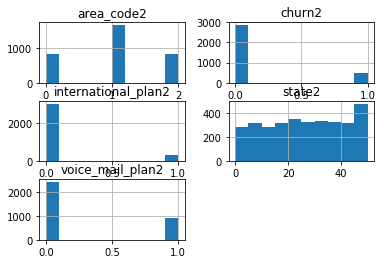


 classes proportions: 
         state2
churn2        
0         2850
1          483


In [13]:
teldf1.iloc[:, 15:].hist()
plt.show()
print('\n', 'classes proportions: \n', teldf1[['state2', 'churn2']].groupby('churn2').count())

In [14]:
from imblearn.over_sampling import SMOTE 

X_nt = teldf1.iloc[:, :19]
Y_nt = teldf1.iloc[:, 19]

cc = SMOTE(random_state=0)
X_res, Y_res = cc.fit_resample(X_nt, Y_nt)

names = teldf1.iloc[:, :19].columns
telres = pd.DataFrame(X_res, columns=names)
telres['churn2'] = Y_res
telres[['state2', 'churn2']].groupby('churn2').count()

,state2
churn2,
0,2850
1,2850


Finaly, let's use Normalizer() to adjust the numeric variables scale; then our model is ready for machine learning.

In [15]:
array_num = telres.iloc[:, :15].values
normalizer = Normalizer().fit(array_num)
array_num_norm = normalizer.transform(array_num)
array_num_norm

array([[0.05343817, 0.5666584 , 0.23512797, ..., 0.00577132, 0.00213753,
        0.27360345],
       [0.06147079, 0.38206462, 0.29080413, ..., 0.00874777, 0.00236426,
        0.25297595],
       [0.        , 0.61407227, 0.28760986, ..., 0.00830032, 0.        ,
        0.34563641],
       ...,
       [0.        , 0.42094655, 0.13734708, ..., 0.00791513, 0.0067468 ,
        0.01474069],
       [0.        , 0.30816036, 0.25679515, ..., 0.0079436 , 0.01207809,
        0.28114075],
       [0.        , 0.63956909, 0.28695493, ..., 0.00474863, 0.00877849,
        0.25936654]])

In [16]:
teldf2 = pd.DataFrame(array_num_norm, columns=teldf1.iloc[:, :15].columns)
teldf2[['area_code2', 'state2', 'international_plan2', 'voice_mail_plan2', 'churn2']] = \
telres[['area_code2', 'state2', 'international_plan2', 'voice_mail_plan2', 'churn2']]
teldf2.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length,area_code2,state2,international_plan2,voice_mail_plan2,churn2
0,0.053438,0.566658,0.235128,0.096338,0.421948,0.211615,0.035868,0.523053,0.194515,0.023534,0.021375,0.006413,0.005771,0.002138,0.273603,1.0,16.0,0.0,1.0,0
1,0.061471,0.382065,0.290804,0.064946,0.462213,0.243519,0.039294,0.601468,0.243519,0.027071,0.032390,0.007093,0.008748,0.002364,0.252976,1.0,35.0,0.0,1.0,0
2,0.000000,0.614072,0.287610,0.104397,0.305775,0.277518,0.025986,0.410222,0.262381,0.018468,0.030779,0.012614,0.008300,0.000000,0.345636,1.0,31.0,0.0,0.0,0
3,0.000000,0.742035,0.175967,0.126151,0.153413,0.218100,0.013036,0.487998,0.220578,0.021959,0.016357,0.017349,0.004412,0.004957,0.208186,0.0,35.0,1.0,0.0,0
4,0.000000,0.455742,0.308931,0.077479,0.405438,0.333537,0.034475,0.510967,0.330803,0.022992,0.027612,0.008202,0.007464,0.008202,0.205043,1.0,36.0,1.0,0.0,0


In [17]:
teldf2.shape

(5700, 20)

In [18]:
X_train = teldf2.iloc[:, :19].values
Y_train = teldf2['churn2']
print(X_train.shape, Y_train.shape)

(5700, 19) (5700,)


## Machine Learning

It was given in the exercise to use Logistic Regression model and to extract the probalities of 'churn' (1) and 'no-churn' (0).

LR: : 0.635 (0.036)


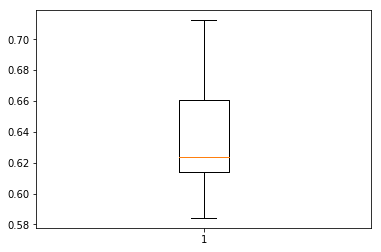

In [19]:
model = LogisticRegression()
kfold = model_selection.KFold(n_splits=10, random_state=7)
cross_val_result = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring='accuracy')

print('%s: %.3f (%.3f)' % ('LR: ', cross_val_result.mean(), cross_val_result.std()))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(cross_val_result)
plt.show()

In [20]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

This model accuracy was not good; let's use gridSearch to tune it:

In [21]:
# Using GridSearch to optimize model

# Defining values for parameters
c = [1.0, 5.0, 10.0]
solv = ['warn', 'liblinear', 'saga']
pen = ['l1', 'l2']
itr = [100, 500, 1000]
values_grid = dict(C = c, solver = solv, penalty = pen, max_iter = itr)

# kfold and model already established
grid = model_selection.GridSearchCV(estimator = model, param_grid=values_grid,
                                   cv = kfold, scoring='accuracy', return_train_score=True)

grid_result = grid.fit(X_train, Y_train)

# Evaluating model tunning
mean_score = [mean for mean in grid_result.cv_results_['mean_test_score']]
std_score = [mean for mean in grid_result.cv_results_['std_test_score']]
params_score = [mean for mean in grid_result.cv_results_['params']]

# Output
print('Best accuracy: %.4f using %s' % (grid_result.best_score_, grid_result.best_params_), '\n')
i = 0
for param in params_score:
    print('%.4f (%.4f) with %r' % (mean_score[i], std_score[i], param))
    i = i + 1;

Best accuracy: 0.7139 using {'C': 5.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'warn'} 

0.6991 (0.0404) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'warn'}
0.6995 (0.0405) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.6128 (0.0495) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.6351 (0.0360) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'warn'}
0.6351 (0.0360) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.5807 (0.0723) with {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.6991 (0.0406) with {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'warn'}
0.6996 (0.0403) with {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
0.6356 (0.0349) with {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
0.6351 (0.0360) with {'C': 1.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'warn'}
0.6351 (0.0360) with {'C': 1.0, 'max_iter': 500, 'pe

Now, let's refit the model and apply it to the training dataset.

In [22]:
model = LogisticRegression(C = 5.0, max_iter=1000, solver='liblinear', penalty='l1')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

confusion_matrix(y_true=Y_train, y_pred=Y_pred)

array([[2155,  695],
       [ 666, 2184]])

In [23]:
Y_prob = model.predict_proba(X_train)
print(Y_prob)
print(Y_prob.shape)

[[0.75765535 0.24234465]
 [0.8914482  0.1085518 ]
 [0.7998289  0.2001711 ]
 ...
 [0.07878781 0.92121219]
 [0.23317075 0.76682925]
 [0.30030884 0.69969116]]
(5700, 2)


In [24]:
dfprob = pd.DataFrame(Y_prob, columns=['prob_no', 'prob_yes'])
dfprob['pred'] = Y_pred
dfprob['churn'] = Y_train
dfprob['ID'] = teldf['Unnamed: 0']
dfprob.head()

,prob_no,prob_yes,pred,churn,ID
0,0.757655,0.242345,0,0,1.0
1,0.891448,0.108552,0,0,2.0
2,0.799829,0.200171,0,0,3.0
3,0.041208,0.958792,1,0,4.0
4,0.078360,0.921640,1,0,5.0


In [25]:
dfprob[['churn', 'pred', 'ID']].groupby(['churn', 'pred']).count()

ID
churn pred      
0     0     2155
      1      695
1     0      137
      1      346

In [26]:
print(classification_report(y_true = Y_train, y_pred = Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2850
           1       0.76      0.77      0.76      2850

   micro avg       0.76      0.76      0.76      5700
   macro avg       0.76      0.76      0.76      5700
weighted avg       0.76      0.76      0.76      5700



It was a good result. Now, we work in the test dataset reapplying all the stages on it.

In [27]:
# Importing data
teltest = pd.read_csv('projeto4_telecom_teste.csv')

# Treating the categoric variables
X_area_code2 = teltest['area_code']
X_state2 = teltest['state']
X_area_code_encoded2 = encoder_areacode.transform(X_area_code2)
X_state_encoded2 = encoder_state.transform(X_state2)
teltst1 = teltest.iloc[:, 6:20]
teltst1['account_length'] = teltest['account_length']
teltst1['area_code2'] = X_area_code_encoded2
teltst1['state2'] = X_state_encoded2
teltst1['international_plan2'] = teltest['international_plan'].apply(lambda x: 1 if x == 'yes' else 0)
teltst1['voice_mail_plan2'] = teltest['voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)
teltst1['churn2'] = teltest['churn'].apply(lambda x: 1 if x == 'yes' else 0)

# Treating the numeric variables
array_num2 = teltst1.iloc[:, :15].values
normalizer2= Normalizer().fit(array_num2)
array_num_norm2 = normalizer2.transform(array_num2)

# Creating dataset
teltst2 = pd.DataFrame(array_num_norm2, columns=teltst1.iloc[:, :15].columns)
teltst2[['area_code2', 'state2', 'international_plan2', 'voice_mail_plan2', 'churn2']] = \
teltst1[['area_code2', 'state2', 'international_plan2', 'voice_mail_plan2', 'churn2']]
teltst2.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length,area_code2,state2,international_plan2,voice_mail_plan2,churn2
0,0.000000,0.187929,0.326026,0.031940,0.561665,0.193495,0.047738,0.625545,0.193495,0.028150,0.028097,0.007952,0.007581,0.007952,0.267712,2,11,0,0,0
1,0.000000,0.537764,0.206832,0.091415,0.588750,0.334299,0.050049,0.226553,0.194807,0.010197,0.022848,0.016835,0.006181,0.000000,0.329489,2,26,0,0,0
2,0.054388,0.552697,0.178168,0.093960,0.445046,0.196923,0.037828,0.563199,0.238183,0.025337,0.025694,0.011253,0.006939,0.001875,0.193172,0,35,0,1,0
3,0.000000,0.554471,0.314575,0.094270,0.323271,0.225062,0.027468,0.564190,0.209717,0.025396,0.040153,0.005115,0.010844,0.002558,0.253195,1,32,0,0,0
4,0.000000,0.533384,0.210760,0.090681,0.335054,0.272907,0.028480,0.552568,0.289119,0.024859,0.020806,0.010808,0.005620,0.005404,0.291821,1,40,0,0,0


In [28]:
X_tst = teltst2.iloc[:, :19].values
Y_tst = teltst2['churn2']
Y_tst_pred = model.predict(X_tst)
Y_tst_prob = model.predict_proba(X_tst)

dfprobtst = pd.DataFrame(Y_tst_prob, columns=['prob_no', 'prob_yes'])
dfprobtst['pred'] = Y_tst_pred
dfprobtst['churn'] = Y_tst 
dfprobtst['ID'] = teltest['Unnamed: 0']
dfprobtst.head()

,prob_no,prob_yes,pred,churn,ID
0,0.633198,0.366802,0,0,1
1,0.822652,0.177348,0,0,2
2,0.754523,0.245477,0,0,3
3,0.536616,0.463384,0,0,4
4,0.508294,0.491706,0,0,5


In [29]:
dfprobtst[['churn', 'pred', 'ID']].groupby(['churn', 'pred']).count()

ID
churn pred      
0     0     1074
      1      369
1     0       54
      1      170

In [30]:
print(classification_report(y_true = Y_tst, y_pred = Y_tst_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.84      1443
           1       0.32      0.76      0.45       224

   micro avg       0.75      0.75      0.75      1667
   macro avg       0.63      0.75      0.64      1667
weighted avg       0.87      0.75      0.78      1667



We got a good result on the test dataset either. We also could extract the probability matrix of the classes per customer.

## End